
<p style="text-align: center;"><font size=6>Курсовая работа<Big></font>
    
<p style="text-align: center;"><font size=5>Формирование контура управления зенитной ракетой.<Big></font>
<p style="text-align: center;"><font size=3><i>Хромов Алексей 715а гр.<i><Big></font>

Передаточная функция от команды управления к ускорению имеет вид:

$$\begin{aligned}
W_\text{кст}(s)=\frac{1}{1+2\xi T_\text{кст}s+T^2_\text{кст}s^2},
\end{aligned}$$

где $T_\text{кст}=0,1\cdot N[\text{с}]$; $\xi=0,7$; $N = 8$(номер в журнале).

Основной критерий: максимальное быстродейтсвие контура управвления. Требуется определить:

1. Принципиальную структурную схему замкнутого контура.
2. Передаточные функции разомкнутого и закнутого контуров управления. Астатизм контура. Характеристические частоты.
3. Коэффициенты ошибок: $\text{с}_0$, $\text{с}_1$, $\text{с}_2$, $\text{с}_3$.
4. Логарифмические частотные характеристики  разомкнутоого и замкнутого контуров. Запасы по фазе и амплитутде. Частоту среза. Показатель колебтельности.
5. Эффективную полосу пропускания.
6. Переходный процесс и весовую функцию. Характеристики переходного процесса.

### 1. Принципиальная структурная схема замкнутого контура.

<img src="https://raw.githubusercontent.com/dart9905/EDU/master/Sem7/coursework/1.png" alt="https://raw.githubusercontent.com/dart9905/EDU/master/Sem7/coursework/1.png" width="500">
<p style="text-align: center;"><font size=2>Рис. 1. График траектори полёта ракеты от точки старта до точки встречи.<Big></font>

$\overrightarrow{V}_\text{ц}$ - скорость цели; $\overrightarrow{V}_\text{р}$ - скорость ракеты; ТВ - точка встречи.

Для составления принципиальной схемы контура, воспользуемся вторым законом Ньютона,то есть функцией упраления(Колебательное звено):

$$\begin{aligned}
W_\text{кст}(s)=\frac{1}{1+2\xi T_\text{кст}s+T^2_\text{кст}s^2},
\end{aligned}$$

и форсирующим звеном:


$$\begin{aligned}
W_\text{фор}(s)=k\cdot(1+Ts).
\end{aligned}$$

Для обратной связи воспользуемся кинематическим звеном с **астатизмом второго порядка**:

$$\begin{aligned}
W_\text{кин}(s)=\frac{1}{s^2}.
\end{aligned}$$

<img src="https://raw.githubusercontent.com/dart9905/EDU/master/Sem7/coursework/2.png" alt="https://raw.githubusercontent.com/dart9905/EDU/master/Sem7/coursework/2.png" width="900">
<p style="text-align: center;"><font size=2>Рис. 2. Принципиальная структурная схема замкнутого контура.<Big></font>

Для дальнейших вычислений напишим модели наших звеньев:

In [1]:
# standard imports\n",
import os
import random
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

default_dpi = plt.rcParamsDefault['figure.dpi']
plt.rcParams['figure.dpi'] = default_dpi*1.6

PI = math.pi

In [2]:
xi = 0.7
N = 8
T_osc = 0.1 * N

def W_osc(s): #oscillating element
    return 1/(1+2*xi*T_osc*s+(T_osc**2)*(s**2))

def W_forc(s, k, T): #the forcing element
    return k*(1+T*s)

def W_kin(s): #the kinematic element
    return 1/(s**2)

### 2. Передаточные функции разомкнутого и закнутого контуров управления. Астатизм контура. Характеристические частоты.

По свойствам передаточных функий наша, для разомкнтуого контура, имеет вид:

$$\begin{aligned}
W(s)=W_\text{кст}(s)\cdot W_\text{фор}(s)\cdot W_\text{кин}(s)=\frac{1}{1+2\xi T_\text{кст}s+T^2_\text{кст}s^2}\cdot k\cdot(1+Ts) \cdot \frac{1}{s^2}.
\end{aligned}$$

Для замкнутого контура:


$$\begin{aligned}
W_k(s)=\frac{W(s)}{1+W(s)}=\frac{k(1+Ts)}{k(1+Ts)+s^2+2\xi T_\text{кст} s^3+T^2_\text{кст}s^4}
\end{aligned}$$

Из $W_\text{кин}(s)\Rightarrow$ **астатизм второго порядка** передаточной функции контура управления.

Характеристическая частота: $$\frac{1}{T_\text{кин}}= 1,25\text{ Гц}.$$


In [3]:
print(1/T_osc, 'Hz')

1.25 Hz


In [4]:
def W(s, k, T):
    return W_osc(s)*W_forc(s, k, T)*W_kin(s)

def W_k(s, k, T):
    return W(s, k, T)/(1+W(s, k, T))

### 3. Коэффициенты ошибок: $\text{с}_0$, $\text{с}_1$, $\text{с}_2$, $\text{с}_3$.


$$\begin{aligned}
W_{\Delta\varepsilon}(s)=\frac{1}{1+W(s)};
\end{aligned}$$

$$\begin{aligned}
\Delta\varepsilon(t)=\int\limits_0^\infty K_{\Delta\varepsilon}(t)g(t-\tau)\,d\tau;\qquad
W_{\Delta\varepsilon}(s)=\int\limits_0^\infty K_{\Delta\varepsilon}(t)e^{-st}\,dt;
\end{aligned}$$
 
$$g(t-\tau)=g(t)-\dot{g}(t)\tau+\frac1{2!}\ddot{g}(t)\tau^2;$$.

$$\Delta\varepsilon(t)=g(t)\int\limits_0^\infty K_{\Delta\varepsilon}(\tau)\,d\tau
-\dot{g}(t)\int\limits_0^\infty K_{\Delta\varepsilon}(\tau)\tau\,d\tau
+\frac1{2!}\ddot{g}(t)\int\limits_0^\infty K_{\Delta\varepsilon}(\tau)\tau^2\,d\tau=
C_1g(t)+C_2\dot{g}(t)-\frac{C_3}{2!}\ddot{g}(t);$$

$$C_0=W_{\Delta\varepsilon}(s)\bigg|_{s=0}=\frac{1}{1+W(s)}\bigg|_{s=0}=0;$$



$$C_1=\frac{d W_{\Delta\varepsilon}(s)}{d s}\bigg|_{s=0}=-\frac{1}{(1+W(s))^2}\cdot\frac{dW_{\Delta\varepsilon}(s)}{ds}\bigg|_{s=0}=0.$$

То что $C_0=C_1=0$ следствие обратной интегральной связи, астатизма второго порядка.

$$C_2=\frac{d^2 W_{\Delta\varepsilon}(s)}{d s^2}\bigg|_{s=0}=\frac2k;$$

$$C_3=\frac{d^3 W_{\Delta\varepsilon}(s)}{d s^3}\bigg|_{s=0}=\frac{2\xi T_\text{кст}-2T}{k}.$$

Из пункта 4, где мы нашли $T$ и $k$:

$$C_2 = 16.$$


In [7]:
'''
Warning: run the code only after finding the required values!!!
'''
print('C_2 = ', 2/k)

C_2 =  16.000000000000004


$$C_3 = -55,04.$$

In [8]:
'''
Warning: run the code only after finding the required values!!!
'''
print('C_3 = ', (2*xi*T_osc-2*T)/k)

C_3 =  -55.04000000000001


### 4. Логарифмические частотные характеристики  разомкнутоого и замкнутого контуров. Запасы по фазе и амплитутде. Частоту среза. Показатель колебтельности.

Построим логарифмическую частотную характеристику для разомкнтудого контура:

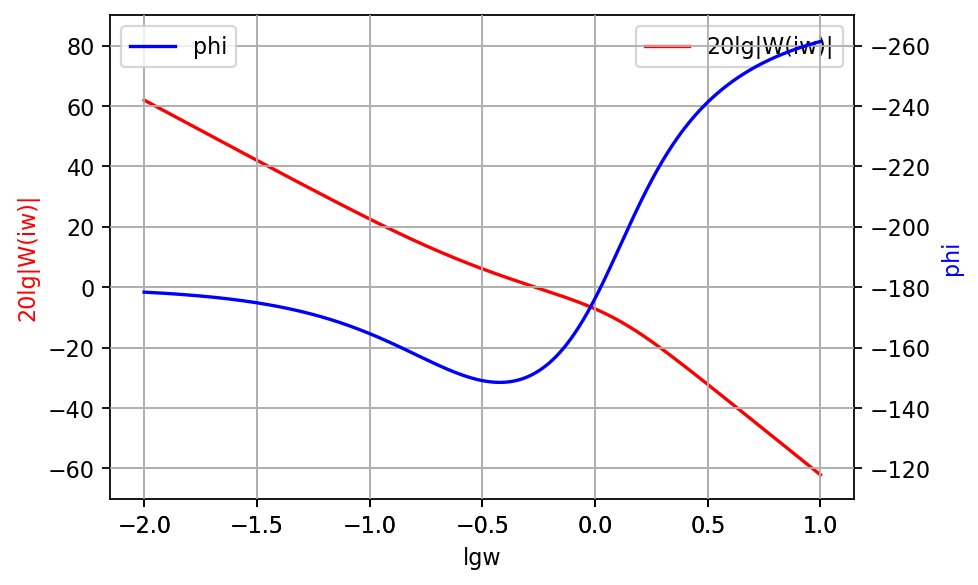

In [9]:
'''
Warning: run the code only after finding the required values!!!
'''
w =[]
data_W_abs = []
data_W_arg = []
for i in range(100000):
    w.append(math.log10((i+100)/10000))
    data_W = W(complex(0, (i+100)/10000), k, T)
    data_W_abs.append(20*math.log10(abs(data_W)))
    data_W_arg.append(math.atan(data_W.imag/data_W.real)*180/PI-180)


fig=plt.figure()

#fig.title('Logarithmic-frequency characteristics')
ax1=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)


ax1.plot(w, data_W_abs, label = u'20lg|W(iw)|', color="r")
ax1.set_xlabel("lgw")
ax1.set_ylabel("20lg|W(iw)|", color="r")
ax1.tick_params(axis='x')
ax1.tick_params(axis='y')
ax1.set_ylim(-70,90)
ax1.grid(True)
ax1.legend()

ax2.plot(w, data_W_arg, label = u'phi', color="b")
ax2.yaxis.tick_right()
ax2.set_ylabel('phi', color="b")    
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='y')
ax2.set_ylim(-270,-110)
ax2.invert_yaxis() 
ax2.grid(True)
ax2.legend()




plt.show()

1. Из повторного интегрирования в кинематическом звене $\Rightarrow$ $-\pi/2-\pi/2=-\pi$ -  начало графика частот;
2. Далее форсирующее звено вносит вклад $+\pi/2$;
3. В конце колебательное звено даёт $-\pi$ - итог $-3\pi/2$.


Характеристическая частота контура стабилизации:

$$w_\text{кст}=1,25 \text{ Гц}.$$

In [10]:
print(1/T_osc, 'Hz')

1.25 Hz


Частота среза и параметры форсирующего звена:

$$w_\text{ср} = \frac{1}{2sT_\text{кст}}\Rightarrow\,T=\frac2w_\text{ср}=2T_\text{ср};$$

$$\frac{k}{w^2_\text{ср}Tw_\text{ср}}\approx1;\qquad\qquad k=\frac{w_\text{ср}}{T};$$

$$W(s)=\frac{1}{s^2}k(1+Ts)\,\,\Rightarrow\,\,|W(w)|=\frac1{w^2}\sqrt{1+w^2T^2}; $$

$$T=5T_\text{кст} =4 \text{ c};\qquad\qquad k=\frac1{12,5*T_\text{кст}^2}=0,125 \,\frac{\text{рад}}{\text{сек}^2};\qquad\qquad w_\text{ср} =\frac2T=0,5\text{ Гц}.$$

In [6]:
'''
now you can run the code above
'''
T = 5*T_osc
k = 1/(12.5*T_osc**2)
w_cut = 2/T#cutoff frequency
print('T =',T,'sec')
print('k =',k,'rad/sec^2')
print('w_cut =',w_cut,'Hz')

T = 4.0 sec
k = 0.12499999999999997 rad/sec^2
w_cut = 0.5 Hz


Найдём запас по фазе. Для этого посчитаем сдвиг форсирующего звена:

$$\Delta\psi_\text{фр}=\arctan w_\text{ср}T = 63,43^\circ.$$

Для колебательного звена:

$$\Delta\psi_\text{кст}=\arctan \frac{2\xi T_\text{кст}w_\text{ср}}{1-w_\text{ср}^2T_\text{кст} ^2} = 33,69^\circ.$$

Тогда запас по фазе для контура управления:

$$\Delta\psi_\text{ку}=\Delta\psi_\text{фр}-\Delta\psi_\text{кст}=29,74^\circ.$$

Мы достигли минимума значения - порога принятого на практике $\Delta\psi_\text{ку}\in[30^\circ;60^\circ]$.

In [11]:
psi_forc = math.atan(w_cut*T)*180/PI
psi_osc  = math.atan((2*xi*T_osc*w_cut)/(1-w_cut**2*T_osc**2))*180/PI
psi = psi_forc - psi_osc
print('psi_forc =',psi_forc)
print('psi_osc =' ,psi_osc)
print('psi ='     ,psi)

psi_forc = 63.43494882292202
psi_osc = 33.690067525979785
psi = 29.744881296942232


$$\Delta\psi_\text{фр}(w_\text{ср})=-\Delta\psi_\text{кст}(w_\text{кр})\qquad\Rightarrow\qquad w_\text{кр}=\frac{\sqrt{1-2\xi T_\text{кст}/T}}{T}=0,212\text{ Гц};$$

Запас по амплитуде:

$$\Delta A_\text{з} = -20 \lg\frac{k}{w^2_\text{кр}}\sqrt{\frac{1+w^2_\text{кр}T^2}{(1-w^2_\text{кр}T_\text{кст}^2)^2+(2\xi T_\text{кст} w_\text{кр})^2}}= -11,2\text{ дБ}$$

На практике значение запаса по амплитуде $\Delta A_\text{з}\in[6;20]$ дБ.

In [12]:
w_cr = math.sqrt(1-2*xi*T_osc/T)/T#critical frequency
A_amp = -20* math.log10(k/(w_cr**2)*math.sqrt(
    (1+w_cr**2*T**2)/
    ((1-w_cr**2*T_osc**2)**2+(2*xi*T_osc*w_cr)**2)))#amplitude margin
print('w_cr =',w_cr,'Hz')
print('A_amp = ', A_amp,'dB')

w_cr = 0.21213203435596426 Hz
A_amp =  -11.230635539989912 dB


Посчитаем показатель колебательности для контура управления. Для этого построим АЧХ замкнутого контура управления.

$$A(w)=\bigg|\frac{W(iw)}{1+W(iw)}\bigg|=|W_k(iw)|.$$

max A = 2.0365463097430907 dB


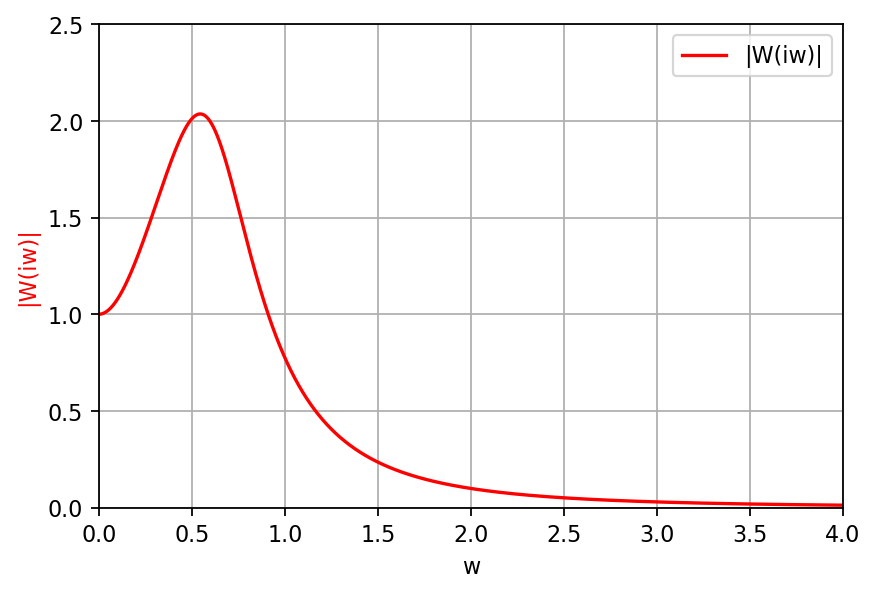

In [31]:
w =[]
data_W_k_abs = []
max_W_k_abs=0

for i in range(100000):
    w.append((i+1)/10000)
    data_W_k = abs(W_k(complex(0, (i+1)/10000), k, T))
    data_W_k_abs.append(data_W_k)
    if data_W_k>max_W_k_abs:
        max_W_k_abs = data_W_k

print('max A =',max_W_k_abs,'dB')
    
fig2=plt.figure()

#fig.title('Logarithmic-frequency characteristics')
ax1=fig2.add_subplot(111, label="1")


ax1.plot(w, data_W_k_abs, label = u'|W(iw)|', color="r")
ax1.set_xlabel("w")
ax1.set_ylabel("|W(iw)|", color="r")
ax1.tick_params(axis='x')
ax1.tick_params(axis='y')
ax1.set_xlim(0,4)
ax1.set_ylim(0,2.5)
ax1.grid(True)
ax1.legend()


plt.show()

Из графика $A_\max\approx2$. Показатель колебательности:

$$M=\frac{A_\max}{A(0)}\approx\frac21=2.$$


Это намного выше рекомендуемого граничного значения колебательнности для контура управления. Должно быть $M<1,3-1,7$.
Так как технически на практике элементы колебательного звена трудно заменимы, будем регулировать форсирующее звено.
Для любых парметров $k$ и $T$ нашего форсирущего звена верно, что $A(0)=1$. Так что $M = |A_\max|$.

Исследуем зависимость $A_\max(T)$ и $A_\max(k)$, где $T$, $k$ - парметры нашего форсирующего звена.

Для начала найдем все максимумы при варьировании $T$, и построим график $A_\max(T)$, чтобы пронаблюдать зависимость. Если мы найдём какие-то $T$, при которых $A_\max(T)$ меньше наших порогов, то выведем эти значения.

min M =  2.0100608088252883 T =  4.3


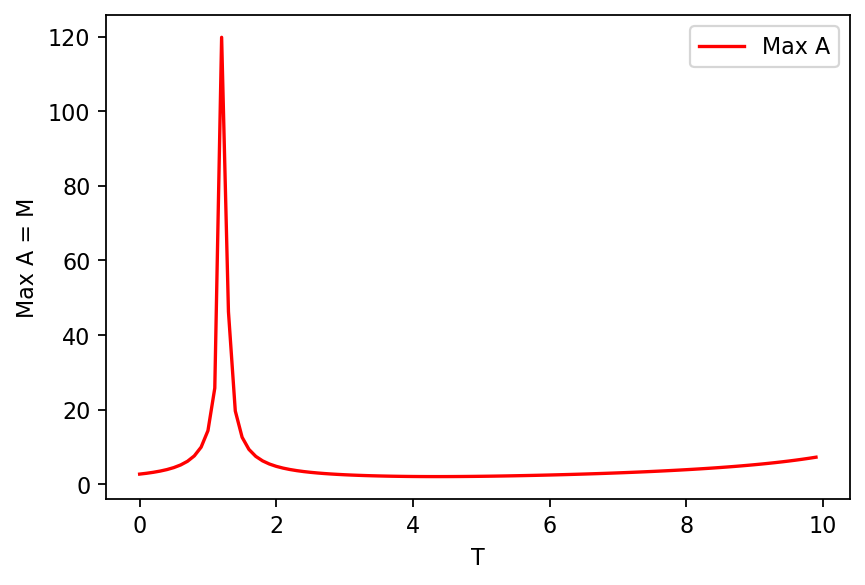

In [42]:
limit_M1 = 1.7
limit_M2 = 1.3
max_W_k_abs=0
data_max_W_k_abs = []
data_var_T = []
min_max_W_k_abs = 10
T_save = 0

for var_T in range(100):
    max_W_k_abs=0
    
    for i in range(100000):
        data_W_k = abs(W_k(complex(0, (i+1)/10000), k, var_T/10))
        if data_W_k>max_W_k_abs:
            max_W_k_abs = data_W_k
            
    data_max_W_k_abs.append(max_W_k_abs)
    data_var_T.append(var_T/10)
    
    if min_max_W_k_abs > max_W_k_abs:
        min_max_W_k_abs = max_W_k_abs
        T_save = var_T/10
        
    if max_W_k_abs < limit_M2:
        print('M = max_W_k_abs',max_W_k_abs,'var_T = ', var_T/10,'sec')
    else:
        if max_W_k_abs < limit_M1:
            print('M = max_W_k_abs',max_W_k_abs,'var_T = ', var_T/10,'sec')
            
            
print('min M = ', min_max_W_k_abs, 'T = ', T_save)
plt.ylabel('Max A = M')
plt.xlabel('T')
plt.plot(data_var_T, data_max_W_k_abs, label = u'Max A', color = 'r')
plt.legend()
plt.show()
    
    

Мы видим, что варьирование параметра $T$ не улучшило ситуации, что минимальныое значение показателя колебательности равно $2,01$ при  $T = 4,3$ с. Заметим, что наше расчетное значение $T = 4,0$ с, то есть мы можем улучшить значение $M$ изменив наш параметр $T$ до $4,3$ с.

Теперь будем изменять $k$ и построим зависимость $|A_\max(k)|$:

M = max_W_k_abs 0 var_k =  0.0 rad/sec^2
M = max_W_k_abs 1.2955806539213204 var_k =  4.1 rad/sec^2
M = max_W_k_abs 1.2904648297239585 var_k =  4.2 rad/sec^2
M = max_W_k_abs 1.285577796888426 var_k =  4.3 rad/sec^2
M = max_W_k_abs 1.2809036705960002 var_k =  4.4 rad/sec^2
M = max_W_k_abs 1.2764280391566039 var_k =  4.5 rad/sec^2
M = max_W_k_abs 1.2721377872523179 var_k =  4.6 rad/sec^2
M = max_W_k_abs 1.2680209582647985 var_k =  4.7 rad/sec^2
M = max_W_k_abs 1.2640666250299673 var_k =  4.8 rad/sec^2
M = max_W_k_abs 1.2602647804537024 var_k =  4.9 rad/sec^2


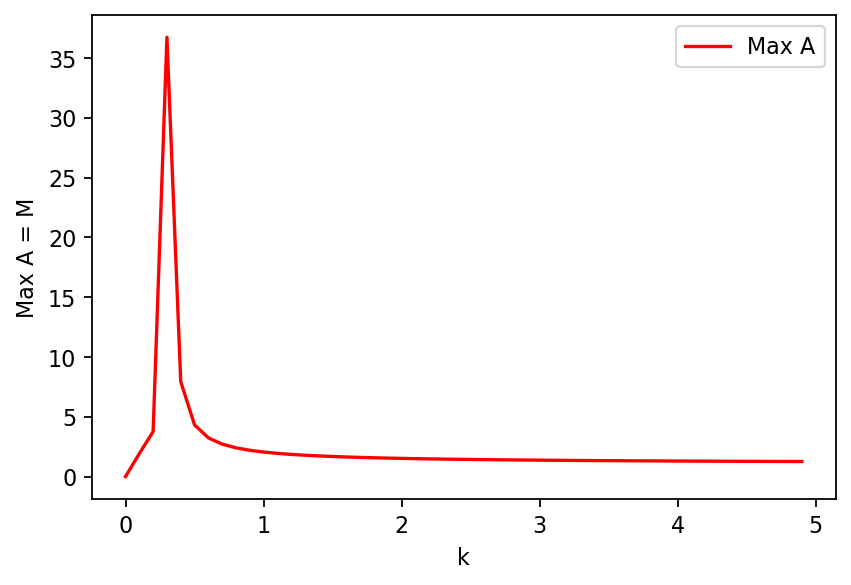

In [41]:
max_W_k_abs=0
data_max_W_k_abs = []
data_var_k = []

for var_k in range(50):
    max_W_k_abs=0
    for i in range(100000):
        data_W_k = abs(W_k(complex(0, (i+1)/10000), var_k/10, T))
        if data_W_k>max_W_k_abs:
            max_W_k_abs = data_W_k
    data_max_W_k_abs.append(max_W_k_abs)
    data_var_k.append(var_k/10)
    if max_W_k_abs < limit_M2:
        print('M = max_W_k_abs',max_W_k_abs,'var_k = ', var_k/10,'rad/sec^2')
#     else:
#         if max_W_k_abs < limit_M1:
#             print('M = max_W_k_abs',max_W_k_abs,'var_k = ', var_k/10,'rad/sec^2')

plt.ylabel('Max A = M')
plt.xlabel('k')
plt.plot(data_var_k, data_max_W_k_abs, label = u'Max A', color = 'r')
plt.legend()
plt.show()

Моделирование показало нам, что начиная с $k = 4,1\frac{\text{рад}}{\text{сек}^2}$ значение $M < 1,3$ и продолжает убывать с ростом $k$. Например:

$$M = 1.29;\qquad k = 4,1\frac{\text{рад}}{\text{сек}^2};$$

$$M = 1.28;\qquad k = 4,3\frac{\text{рад}}{\text{сек}^2};$$

$$M = 1.27;\qquad k = 4,5\frac{\text{рад}}{\text{сек}^2};$$

$$...$$

### 5. Эффективную полосу пропускания.

Формула ширины полосы пропускания:
$$w_\text{эф} = \int\limits_0^\infty \frac{|W(iw)|^2}{W^2(0)}\,dw;$$

В нашем случае $W^2(0) = 1:$
$$w_\text{эф} = \int\limits_0^\infty|W(iw)|^2\,dw;$$


0.9112


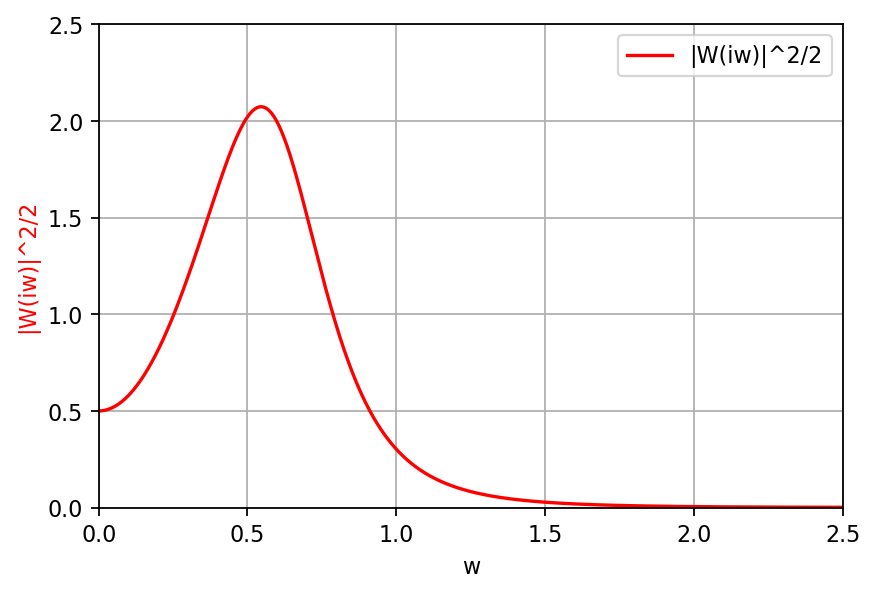

In [69]:
w =[]
data_W_k_abs = []
key = 1
for i in range(100000):
    w.append((i+1)/10000)
    data_W_k = abs(W_k(complex(0, (i+1)/10000), k, T))**2/2
    data_W_k_abs.append(data_W_k)
    if (data_W_k < 0.5)&(key):
        print((i+1)/10000)
        key = 0

    
fig2=plt.figure()

#fig.title('Logarithmic-frequency characteristics')
ax1=fig2.add_subplot(111, label="1")


ax1.plot(w, data_W_k_abs, label = u'|W(iw)|^2/2', color="r")
ax1.set_xlabel("w")
ax1.set_ylabel("|W(iw)|^2/2", color="r")
ax1.tick_params(axis='x')
ax1.tick_params(axis='y')
ax1.set_xlim(0,2.5)
ax1.set_ylim(0,2.5)
ax1.grid(True)
ax1.legend()


plt.show()

Эффективная полоса пропускания определняется по графику $w_\text{эф} = 0,9112\text{ Гц}.$ 

### 6. Переходный процесс и весовую функцию. Характеристики переходного процесса.
Для нахождения $K(t)$ - весовой функции, подадим на вход дельта импульс $\delta(t)$.

$$K(t)=\int\limits_0^tK(t)\delta(t-\tau)\,d\tau=\frac1{2\pi i}\int\limits_{c-iw}^{c+iw}W_k(s)e^{st}\,ds.$$

Смоделируем ситуацию и изучим график.

In [110]:
def delta(t):
    out = 0
    if t == 0:
        out = 100000000000
    return out

def exp(x):
    return 1+x+x**2/2+x**3/6+x**4/24

def spect(t, w):
    X = 0
    dt=1/10000000
    for i in range(100000):
        t= i/100
        X+=delta(t)*exp(complex(0, -t*w))*dt+delta(-t)*exp(complex(0, t*w))*dt
    return X


def model(t, k, T):
    y = 0
    dw = 1/10000000
    for i in range(100000):
        w = complex(0, (i+0.1)/100)
        y+=W_k(w, k, T)*spect(t, w)*exp(w*t)*dw+W_k(-w, k, T)*spect(t, -w)*exp(-w*t)*dw
    y=y/(2*PI)
    return y
    

In [111]:
data_y = []
data_x = []

for i in range(200):
    data_x.append(model(i/10, k, T))
    data_y.append(i/10)

KeyboardInterrupt: 

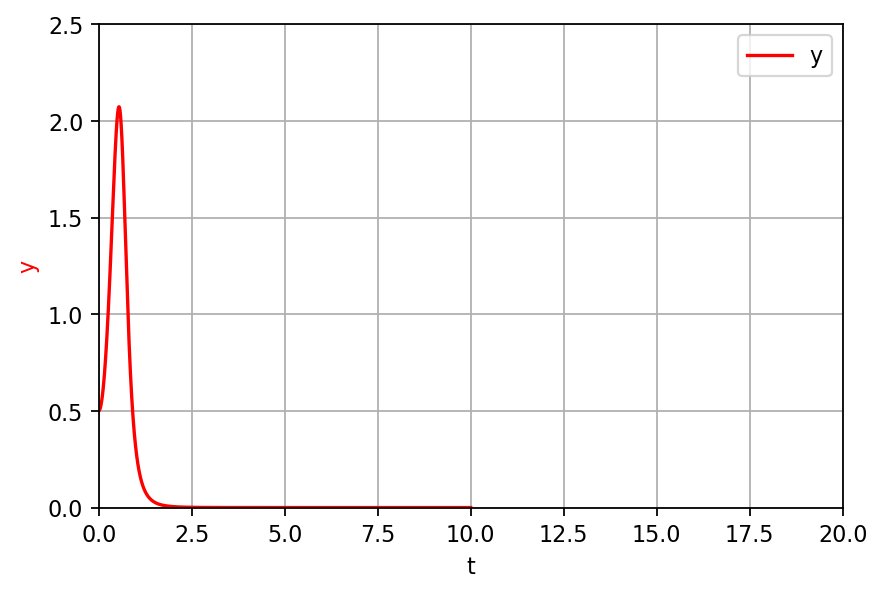

In [97]:

    
fig2=plt.figure()

#fig.title('Logarithmic-frequency characteristics')
ax1=fig2.add_subplot(111, label="1")


ax1.plot(w, data_W_k_abs, label = u'y', color="r")
ax1.set_xlabel("t")
ax1.set_ylabel("y", color="r")
ax1.tick_params(axis='x')
ax1.tick_params(axis='y')
ax1.set_xlim(0,20)
ax1.set_ylim(0,2.5)
ax1.grid(True)
ax1.legend()


plt.show()